This demonstration shows how to use cropping, resizing and rescaling operations on an
image in Julia using ImageTransformations.jl

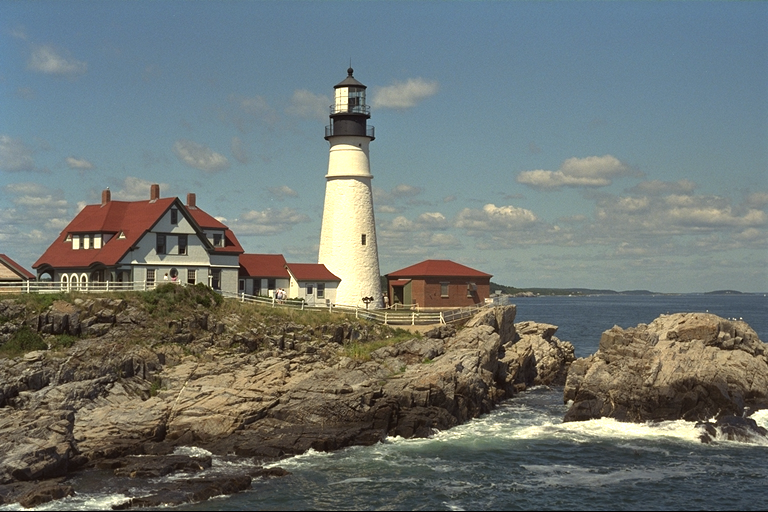

In [1]:
using Images, TestImages, OffsetArrays
# ImageTransformations is reexported by Images
# load an example image
img_source = testimage("lighthouse")

## Cropping Operation

Cropping is one of the most basic photo manipulation processes, and it is carried out to
remove an unwanted object or irrelevant noise from the periphery of a photograph, to
change its aspect ratio, or to improve the overall composition.

Let's first check the size of the image

In [2]:
img_size = size(img_source)

(512, 768)

Output is `(512,768)` which stands means `img_source` is `512` in height and `768` in width.
In Julia, images as multidimensional arrays are stored in column-major order, which means that this first index corresponds to the
vertical axis (column) and the second to the horizontal axis (row).

!!! tip
    An related issue about the memory order is the indexing performance, see [Performance Tips](https://docs.julialang.org/en/v1/manual/performance-tips/#man-performance-column-major) for more details.

Let's crop the image from sides by `1/8` of `img_source` each side and leave it as it is from
top to bottom.

Easiest way to do this is indexing: `img_source[y1:y2, x1:x2]`

Region of Interest: [y1, y2] sets the range for y-axis and [x1, x2] sets the range for
x-axis of source image.

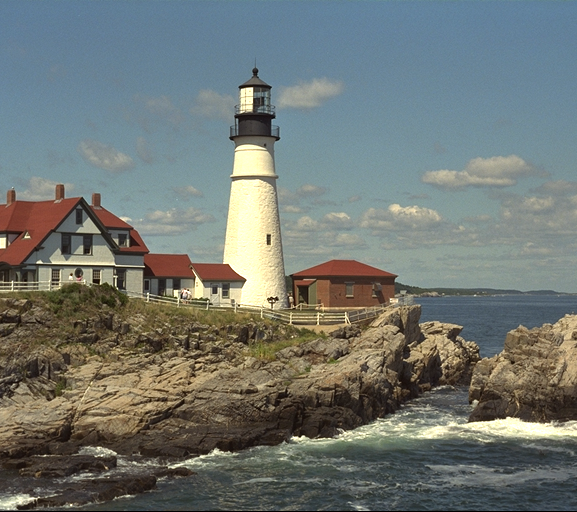

In [3]:
img_cropped = @view img_source[ :,floor(Int, 1/8*img_size[2]) : floor(Int, 7/8*img_size[2])]

Let's see the size of the cropped image:

In [4]:
size(img_cropped)

(512, 577)

We can also do size-preserved cropping of the image by replacing the contents of image to white pixels or transparent pixels using PaddedView:

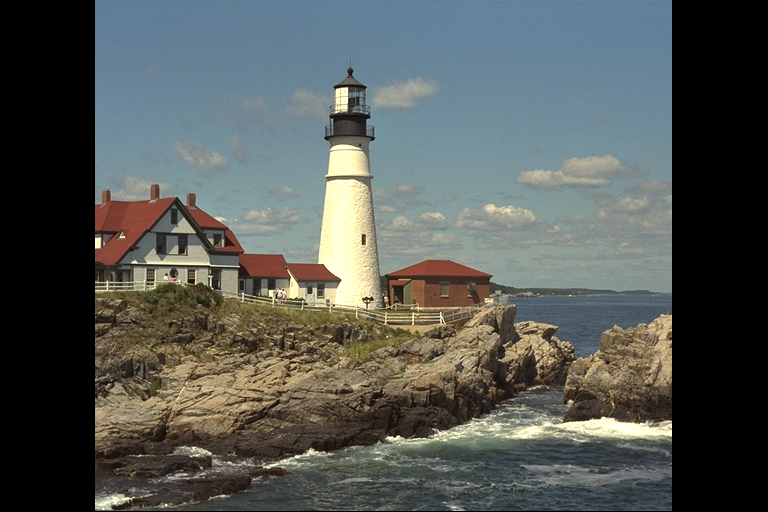

In [5]:
img_padded = PaddedView(
    zero(eltype(img_source)),
    OffsetArray(img_cropped, OffsetArrays.Origin(1, floor(Int, 1/8*img_size[2]))),
    axes(img_source))

## Resizing Operation

Resizing is a method to resize an image to a given specific output image shape. It is
different from rescaling as in rescaling we use a scaling factor to manipulate the image.

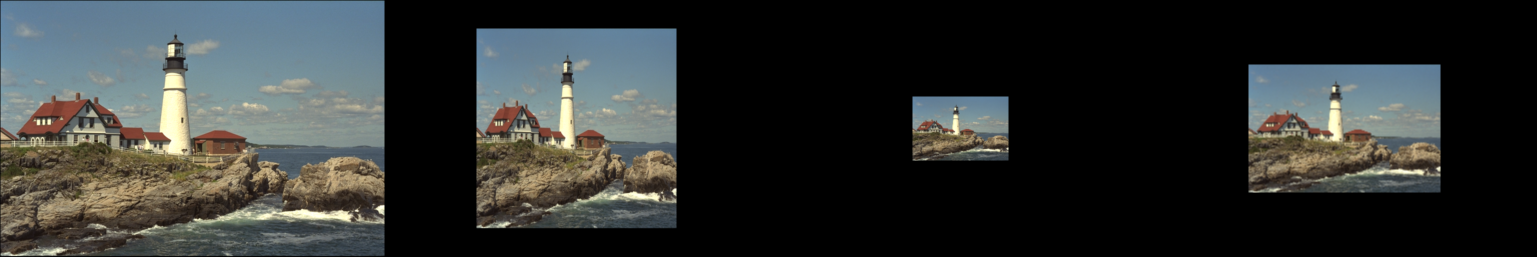

In [6]:
img_square = imresize(img_source, (400, 400));
img_small = imresize(img_source, ratio=1/4);
img_medium = imresize(img_small, size(img_small).*2);
mosaicview(img_source, img_square, img_small, img_medium; nrow=1)

## Rescaling

Rescale operation resizes an image by a given scaling factor. The scaling factor can
either be a single floating point value, or multiple values - one along each axis.
Image scaling is the process of changing the size of an image while preserving the
original aspect ratio.

### Rescaling by percentage

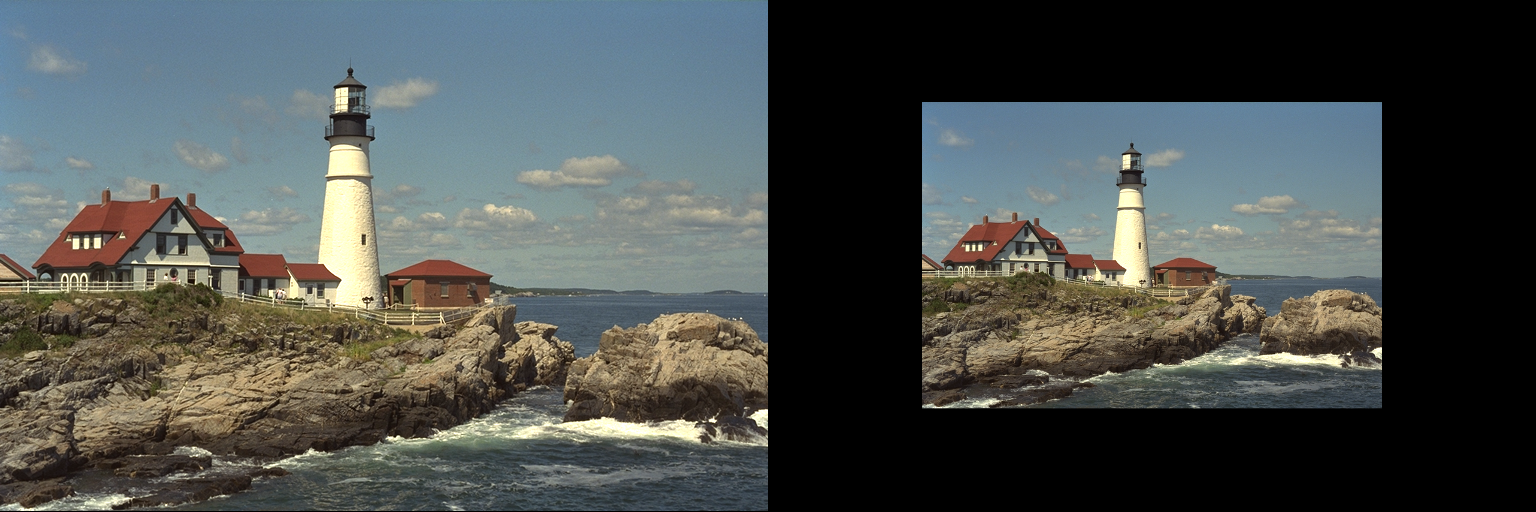

In [7]:
percentage_scale = 0.6
new_size = trunc.(Int, size(img_source) .* percentage_scale)
img_rescaled = imresize(img_source, new_size);
mosaicview(img_source, img_rescaled; nrow=1)

We calculated new size by estimating the size of frame by multiplying size by scale and
then truncated it to Int format.

### Rescaling to a specific dimension

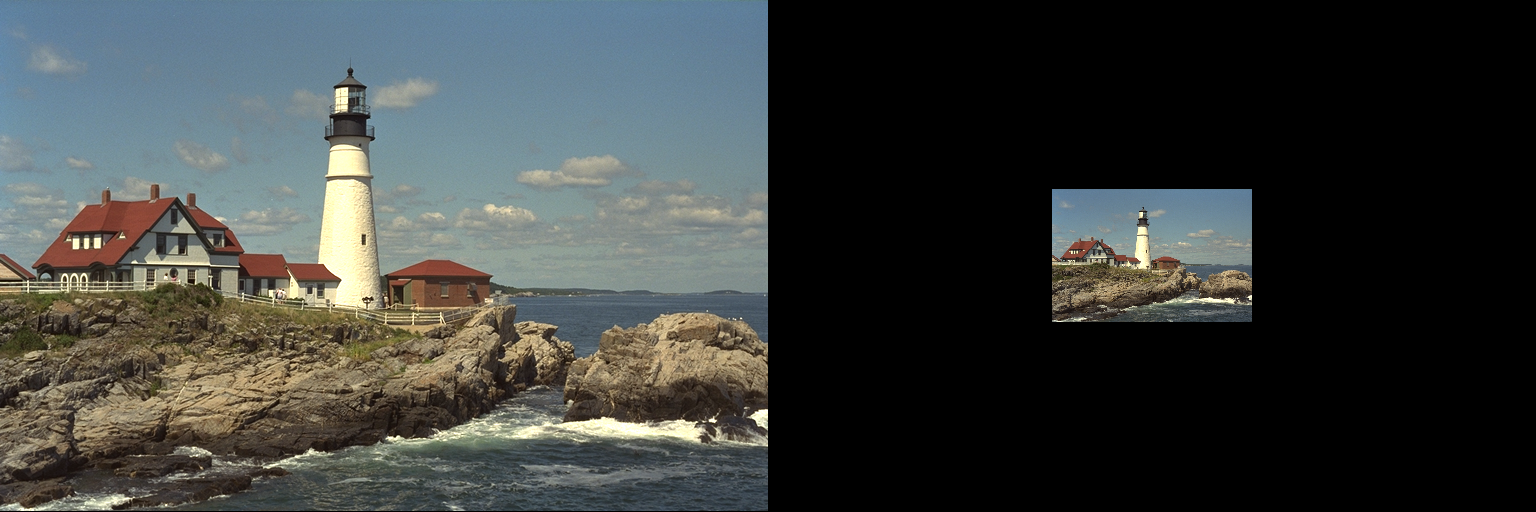

In [8]:
new_width = 200
percentage_scale = new_width / size(img_source,2);
new_size = trunc.(Int, size(img_source) .* percentage_scale);
img_rescaled = imresize(img_source, new_size);
mosaicview(img_source, img_rescaled; nrow=1)

We have updated our scale by percentage solution to calculate scale-percentage
dynamically based on a change in one of the dimensions.
Remember: `size(sourceimage) == (height, width)`

### Rescaling by two-fold using restrict function

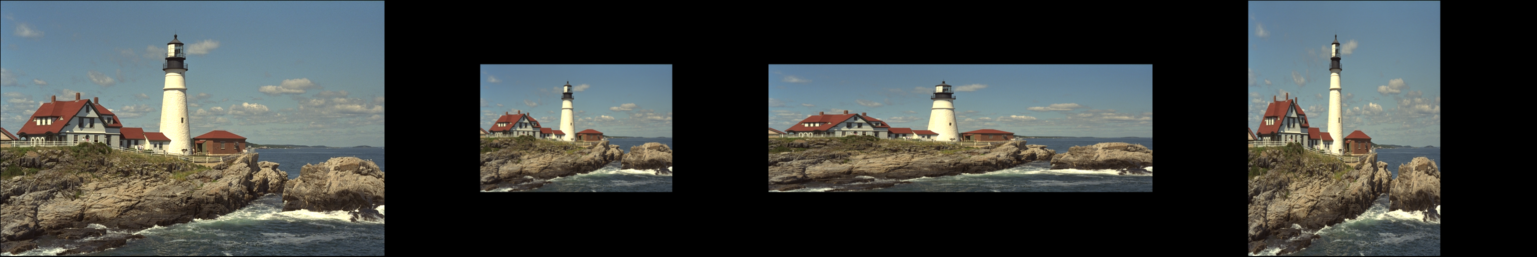

In [9]:
rescaled_both = restrict(img_source); # both side
rescaled_height = restrict(img_source, 1); # dims=1, i.e., height dimension
rescaled_width = restrict(img_source, 2); # dims=2, i.e., width dimension
mosaicview(img_source, rescaled_both, rescaled_height, rescaled_width; nrow=1)

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*